April 2015, J. Slavič in L. Knez

Vprašanje 1: Na podatkih:
$$x = [-1.00, -0.50, 0.00, 0.50, 1.00]$$
$$y = [−1.00, −0.55, 0.00, 0.45, 1.00]$$
uporabite linearne zlepke in določite prvi odvod.

Uvozimo module:

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


Definiramo podatke:

In [2]:
x = np.asarray([-1, -0.50, 0.00, 0.50, 1.00], dtype = float)
y = np.asarray([-1, -0.55, 0.00, 0.45, 1.00], dtype = float)


Uvozimo zlepke, izračunamo odvod in narišemo rezultate:

Odvodi: [ 0.9  1.1  0.9  1.1  1.1]


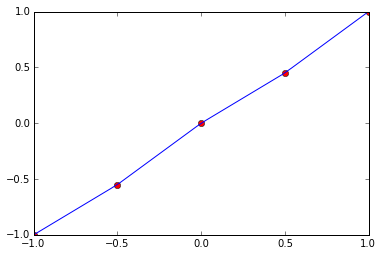

In [3]:
from scipy.interpolate import InterpolatedUnivariateSpline

spl_lin = InterpolatedUnivariateSpline(x, y, k=1)
spl_odv_1 = spl_lin.derivative(1)

# Izpišimo odvode v točkah
print('Odvodi:', spl_odv_1(x))

xint = np.linspace(np.min(x), np.max(x), 40)

plt.plot(x, y, 'ro');
plt.plot(xint, spl_lin(xint));

Vprašanje 2: Na zgornjih podatkih izračunajte linearno aproksimacijo ter določite parametra aproksimacije.

"Ročni" način:

In [4]:
A = [[np.sum(x**2), np.sum(x)],
     [np.sum(x), len(x)]]
b = [np.dot(y,x), np.sum(y)]

A = np.asarray(A)
b = np.asarray(b)

a0, a1 = np.linalg.solve(A, b)
a0, a1

Uporaba vgrajene numpy funkcije:

In [5]:
a0_np, a1_np = np.polyfit(x, y, deg=1)
a0_np, a1_np

Parameter $a_0$ zgoraj predstavlja naklon premice, to je hkrati tudi vrednost prvega odvoda. 

Vprašanje 3: Na nateznem testu ste testirali aluminijeve vzorce; rezultati testa so podani spodaj.

    Napetost [MPa]:
$$\sigma = [34.5, 69.0, 103.5, 138.0]$$

    Specifična deformacija [mm/m]
$$vzorec_1 = [0.46, 0.95, 1.48, 1.93]$$
$$vzorec_2 = [0.34, 1.02, 1.51, 2.09]$$
$$vzorec_3 = [0.37, 1.00, 1.51, 2.05]$$
    S pomočjo linearne aproksimacije določite elastični modul (napetost/specifična deformacija) vsakega posameznega vzorca.
    

Definiramo podatke:

In [6]:
sigma = np.asarray([34.5, 69, 103.5, 138], dtype=float)               # [Mpa]
epsilon_1 = np.asarray([0.46, 0.95, 1.48, 1.93], dtype=float)         # [mm/m] 
epsilon_2 = np.asarray([0.34, 1.02, 1.51, 2.09], dtype=float)         # [mm/m]
epsilon_3 = np.asarray([0.37, 1.00, 1.51, 2.05], dtype=float)         # [mm/m]

Linearna aproksimacija ($\sigma = E\,\epsilon$): 

In [7]:
E_1, zamik_1 = np.polyfit(epsilon_1, sigma, deg=1)
E_2, zamik_2 = np.polyfit(epsilon_2, sigma, deg=1)
E_3, zamik_3 = np.polyfit(epsilon_3, sigma, deg=1)

print('E_1:{:6.4g} GPa'.format(E_1))
print('E_2:{:6.4g} GPa'.format(E_2))
print('E_3:{:6.4g} GPa'.format(E_3))

E_1: 69.77 GPa
E_2: 59.87 GPa
E_3: 62.04 GPa


Prikaz:

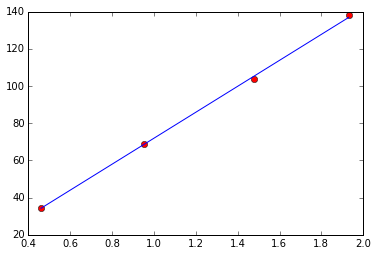

In [8]:
eps = epsilon_1
sig = sigma
fun = np.poly1d(np.polyfit(eps, sig, deg=1))  # Naredimo polinom s pomočjo np.poly1d 
#fun = np.poly1d([E_1, zamik_1])

plt.plot(eps, sig, 'ro')
plt.plot(eps, fun(eps));

Vprašanje 4: Za Al vzorce zgoraj linearno aproksimirajte elastični modul čez vse vzorce. Določite tudi standardno napako (glejte ``np.std``).

Najprej združimo vse specifične deformacije v en vektor:

In [9]:
epsilon = np.asarray([epsilon_1, epsilon_2, epsilon_3])
epsilon = epsilon.flatten()    # Flatten vrne kopijo prvotnih podatkov, jih stisne v 1D niz
epsilon

array([ 0.46,  0.95,  1.48,  1.93,  0.34,  1.02,  1.51,  2.09,  0.37,
        1.  ,  1.51,  2.05])

Napetost ustrezno razširimo:

In [10]:
sigma = np.asarray([sigma for _ in range(3)])
sigma

array([[  34.5,   69. ,  103.5,  138. ],
       [  34.5,   69. ,  103.5,  138. ],
       [  34.5,   69. ,  103.5,  138. ]])

In [11]:
sigma = sigma.flatten()   # Preoblikujemo v 1D niz
sigma

array([  34.5,   69. ,  103.5,  138. ,   34.5,   69. ,  103.5,  138. ,
         34.5,   69. ,  103.5,  138. ])

Linearno aproksimiramo čez vse vzorce (dobimo 3 rezultate, ker imamo 3 sete vzorcev):

In [12]:
fit = np.polyfit(epsilon, sigma, deg=1)
fit_func = np.poly1d(fit)  # Pripravimo si funkcijo
E, zamik = fit
E

Narišemo:

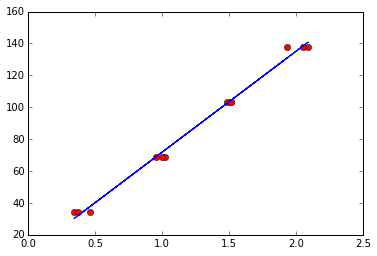

In [14]:
eps = epsilon
sig = sigma

plt.plot(eps, sig, 'ro')
plt.plot(eps, fit_func(eps));

Preverimo razliko med aproksimacijo in podatki:

In [15]:
razlika = sigma - fit_func(eps)
razlika

array([-3.2532802 ,  0.21726252,  1.15478832,  7.15834796,  4.34577056,
       -4.2155171 , -0.74497437, -2.97371973,  2.44600787, -2.94900863,
       -0.74497437, -0.44070281])

Določimo standardno napako:

In [16]:
Std = np.std(razlika) 
Std

Vprašanje 5: Raziščite pomoč za funkcijo ``np.polyfit`` in utežite različne vzorce z različno utežjo (npr. da prvi meritvi zaupate manj). Izračunajte nato linearno aproksimiran elastični modul.

Podobno kot zgoraj, le da dodatno definiramo še utež:

In [17]:
# Definiramo utež (prvi in zadnji meritvi manj zaupamo)
utez = np.asarray([0.1, 1, 1, 0.1])

# Sedaj pa to pripravimo za vse vzorce
utez = np.asarray([utez for _ in range(3)]).flatten()
utez

array([ 0.1,  1. ,  1. ,  0.1,  0.1,  1. ,  1. ,  0.1,  0.1,  1. ,  1. ,
        0.1])

In [18]:
fit = np.polyfit(epsilon, sigma, deg=1, w=utez)
fit_func = np.poly1d(fit) # Pripravimo si funkcijo
E, zamik = fit
E

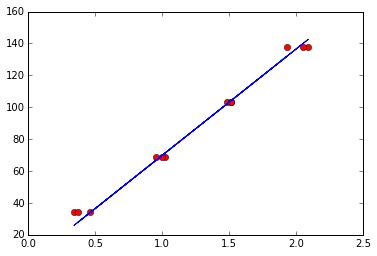

In [19]:
eps = epsilon
sig = sigma

plt.plot(eps, sig, 'ro')
plt.plot(eps, fit_func(eps));